# **Data Cleaning and Analysis of Cricket Player Statistics**

This notebook provides a comprehensive guide to cleaning and analyzing a dataset containing cricket player statistics. The dataset includes information about players' careers, batting statistics, and other relevant attributes.


**The dataset comprises information about cricket players and their batting statistics. It includes the following attributes for each player:** 🏏

- **Player**: The name of the cricket player.
- **Span**: The duration of the player's career.
- **Matches**: The total number of matches played by the player.
- **Innings**: The total number of batting innings played by the player.
- **Not Out**: The number of times the player remained not out after batting.
- **Runs**: The total runs scored by the player.
- **Highest Innings Score**: The highest individual score made by the player in a single innings.
- **Batting Average (Ave)**: The average number of runs scored by the player per dismissal.
- **Balls Faced**: The total number of balls faced by the player while batting.
- **Batting Strike Rate**: The rate at which the player scores runs, calculated as the number of runs scored per 100 balls faced.
- **Centuries Scored**: The number of centuries (100 or more runs in a single innings) scored by the player.
- **Fifties Scored**: The number of half-centuries (50-99 runs in a single innings) scored by the player.
- **Ducks Scored**: The number of times the player scored zero runs (duck) in an innings.
- **Boundary Fours**: The total number of boundary fours (4 runs) hit by the player.
- **Boundary Sixes**: The total number of boundary sixes (6 runs) hit by the player.

This dataset provides comprehensive information about the batting performance of cricket players, facilitating detailed analysis of their playing style, consistency, and overall contribution to the team.


## Data Cleaning Process in Python Pandas (Jupyter Notebook):

In [10]:
dataurl = "https://www.espncricinfo.com/records/highest-career-batting-average-282910"

### Importing Libraries:

*   Import the pandas library to utilize its functionality for data manipulation.


*   Import the matplotlib library to utilize its functionality for data visualization.





In [55]:
import pandas as pd
import matplotlib.pyplot as plt

### Loading the Data:

*   *Load the dataset containing cricket player statistics into a pandas DataFrame using the `pd.read_csv()` or appropriate method.*




In [12]:
df = pd.read_csv("/content/testmatches(in).csv")
df

,Player,Span,Mat,Inns,NOr,Runs,HSa,Ave,BFa,SRa,100,50a,0aa,4saa,6sa
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6
1,HC Brook (ENG),2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,WH Ponsford (AUS),1924-1934,29,48,4,2122,266,48.22,3118+,44.77,7,6,1,119+,0
60,SJ McCabe (AUS),1930-1938,39,62,5,2748,232,48.21,3217+,60.02,6,13,4,241+,5+
61,DR Jardine (ENG),1928-1934,22,33,6,1296,127,48.00,2110+,25.59,1,10,2,53+,0
62,M Labuschagne (AUS),2018-2024,50,90,7,4114,215,49.56,7809,52.68,11,20,4,463,12


### Changing Column Names:

*   *Rename the columns to be more descriptive using the `.rename()` method or by directly assigning new column names to the `columns` attribute.*



In [13]:
# Rename columns for better readability and consistency
df = df.rename(columns = {'Mat':'Matches',
                          'NOr':'Not_Out',
                          'HSa':'Highest_Inns_Score',
                          'BFa':'Balls_Faced',
                          'SRa':'Batting_Strike_Rate',
                          '100':'Hundered_Scored',
                          '50a':'Fifties_Scored',
                          '0aa':'Ducks_Scored',
                          '4saa':'Boundary_Fours',
                          '6sa':'Boundary_Sixes'})
# print the column names to verify the changes
print(df.columns)

Index(['Player', 'Span', 'Matches', 'Inns', 'Not_Out', 'Runs',
       'Highest_Inns_Score', 'Ave', 'Balls_Faced', 'Batting_Strike_Rate',
       'Hundered_Scored', 'Fifties_Scored', 'Ducks_Scored', 'Boundary_Fours',
       'Boundary_Sixes'],
      dtype='object')


### Checking Null Values:
*   Use the `isnull()` method or `info()` function to check for missing values (null values) in the dataset.


In [14]:
# Check for missing values (null values) in each column
# The .isnull() method returns a DataFrame of the same shape as 'df',
# where each element is True if it is NaN (missing) and False otherwise
# The .any() method is then applied to check if there are any True values (missing values) in each column
missing_values = df.isnull().any()

# Print the result to identify columns with missing values
print(missing_values)


Player                 False
Span                   False
Matches                False
Inns                   False
Not_Out                False
Runs                   False
Highest_Inns_Score     False
Ave                    False
Balls_Faced             True
Batting_Strike_Rate     True
Hundered_Scored        False
Fifties_Scored         False
Ducks_Scored           False
Boundary_Fours         False
Boundary_Sixes         False
dtype: bool


Seems to be that we have some null values in two of our columns

In [15]:
df[df['Balls_Faced'].isna()== 1]

,Player,Span,Matches,Inns,Not_Out,Runs,Highest_Inns_Score,Ave,Balls_Faced,Batting_Strike_Rate,Hundered_Scored,Fifties_Scored,Ducks_Scored,Boundary_Fours,Boundary_Sixes
8,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,NaN,NaN,15,19,6,258+,2
14,CL Walcott (WI),1948-1960,44,74,7,3798,220,56.68,NaN,NaN,15,14,1,107+,11
54,Hon.FS Jackson (ENG),1893-1905,20,33,4,1415,144*,48.79,NaN,NaN,5,6,3,51+,0


### **Filling Null Values:**

*   Fill or impute missing values using methods like `fillna()`


In [16]:
df['Balls_Faced'] = df['Balls_Faced'].fillna(0)

Checking the adjustments we did

In [17]:
df[df['Player'].isin(['ED Weekes (WI)', 'CL Walcott (WI)', 'Hon.FS Jackson (ENG)'])]

,Player,Span,Matches,Inns,Not_Out,Runs,Highest_Inns_Score,Ave,Balls_Faced,Batting_Strike_Rate,Hundered_Scored,Fifties_Scored,Ducks_Scored,Boundary_Fours,Boundary_Sixes
8,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,0,NaN,15,19,6,258+,2
14,CL Walcott (WI),1948-1960,44,74,7,3798,220,56.68,0,NaN,15,14,1,107+,11
54,Hon.FS Jackson (ENG),1893-1905,20,33,4,1415,144*,48.79,0,NaN,5,6,3,51+,0


In [18]:
df['Batting_Strike_Rate'] = df['Batting_Strike_Rate'].fillna(0)
df[df['Player'].isin(['ED Weekes (WI)', 'CL Walcott (WI)', 'Hon.FS Jackson (ENG)'])]

,Player,Span,Matches,Inns,Not_Out,Runs,Highest_Inns_Score,Ave,Balls_Faced,Batting_Strike_Rate,Hundered_Scored,Fifties_Scored,Ducks_Scored,Boundary_Fours,Boundary_Sixes
8,ED Weekes (WI),1948-1958,48,81,5,4455,207,58.61,0,0.0,15,19,6,258+,2
14,CL Walcott (WI),1948-1960,44,74,7,3798,220,56.68,0,0.0,15,14,1,107+,11
54,Hon.FS Jackson (ENG),1893-1905,20,33,4,1415,144*,48.79,0,0.0,5,6,3,51+,0


### Checking Duplicates:


*   Identify duplicate rows using the `duplicated()` method and check for duplicate values in specific columns if needed.



In [19]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
59    False
60    False
61    False
62     True
63     True
Length: 64, dtype: bool

In [20]:
df[df['Player'].duplicated()==1]

,Player,Span,Matches,Inns,Not_Out,Runs,Highest_Inns_Score,Ave,Balls_Faced,Batting_Strike_Rate,Hundered_Scored,Fifties_Scored,Ducks_Scored,Boundary_Fours,Boundary_Sixes
62,M Labuschagne (AUS),2018-2024,50,90,7,4114,215,49.56,7809,52.68,11,20,4,463,12
63,Abid Ali (PAK),2019-2021,16,26,2,1180,215*,49.16,2445,48.26,4,3,2,148,5


In [21]:
df[df['Player'].isin(['M Labuschagne (AUS)', 'Abid Ali (PAK)'])]

,Player,Span,Matches,Inns,Not_Out,Runs,Highest_Inns_Score,Ave,Balls_Faced,Batting_Strike_Rate,Hundered_Scored,Fifties_Scored,Ducks_Scored,Boundary_Fours,Boundary_Sixes
45,M Labuschagne (AUS),2018-2024,50,90,7,4114,215,49.56,7809,52.68,11,20,4,463,12
49,Abid Ali (PAK),2019-2021,16,26,2,1180,215*,49.16,2445,48.26,4,3,2,148,5
62,M Labuschagne (AUS),2018-2024,50,90,7,4114,215,49.56,7809,52.68,11,20,4,463,12
63,Abid Ali (PAK),2019-2021,16,26,2,1180,215*,49.16,2445,48.26,4,3,2,148,5


### Dropping Duplicates:


*   Remove duplicate rows using the `drop_duplicates()` method to ensure data uniqueness.



In [22]:
df = df.drop_duplicates()

Checking the results

In [23]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
57    False
58    False
59    False
60    False
61    False
Length: 62, dtype: bool

### **Creating New Columns by Splitting 'Span' Column:**

*   Split the 'Span' column into two separate columns ('Rookie_Year' and 'Final_Year') using the `str.split()` method.



In [24]:
df['Span']

0     1928-1948
1     2022-2023
2     2015-2016
3     1963-1970
4     1930-1954
        ...    
57    1965-1981
58    2002-2014
59    1924-1934
60    1930-1938
61    1928-1934
Name: Span, Length: 62, dtype: object

In [25]:
df['Span'].str.split(pat = '-')

0     [1928, 1948]
1     [2022, 2023]
2     [2015, 2016]
3     [1963, 1970]
4     [1930, 1954]
          ...     
57    [1965, 1981]
58    [2002, 2014]
59    [1924, 1934]
60    [1930, 1938]
61    [1928, 1934]
Name: Span, Length: 62, dtype: object

In [26]:
df['Rookie_Year'] = df['Span'].str.split(pat = '-').str[0]
df['Final_Year'] = df['Span'].str.split(pat = '-').str[1]

<ipython-input-26-db5e935a8f13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rookie_Year'] = df['Span'].str.split(pat = '-').str[0]
<ipython-input-26-db5e935a8f13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Final_Year'] = df['Span'].str.split(pat = '-').str[1]


In [27]:
print(df.columns)
df.head()

Index(['Player', 'Span', 'Matches', 'Inns', 'Not_Out', 'Runs',
       'Highest_Inns_Score', 'Ave', 'Balls_Faced', 'Batting_Strike_Rate',
       'Hundered_Scored', 'Fifties_Scored', 'Ducks_Scored', 'Boundary_Fours',
       'Boundary_Sixes', 'Rookie_Year', 'Final_Year'],
      dtype='object')


,Player,Span,Matches,Inns,Not_Out,Runs,Highest_Inns_Score,Ave,Balls_Faced,Batting_Strike_Rate,Hundered_Scored,Fifties_Scored,Ducks_Scored,Boundary_Fours,Boundary_Sixes,Rookie_Year,Final_Year
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6,1928,1948
1,HC Brook (ENG),2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11,1963,1970
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1,1930,1954


Dropping span Because We do not need It any more

In [28]:
df = df.drop(['Span'],axis =1)

In [29]:
df.columns

Index(['Player', 'Matches', 'Inns', 'Not_Out', 'Runs', 'Highest_Inns_Score',
       'Ave', 'Balls_Faced', 'Batting_Strike_Rate', 'Hundered_Scored',
       'Fifties_Scored', 'Ducks_Scored', 'Boundary_Fours', 'Boundary_Sixes',
       'Rookie_Year', 'Final_Year'],
      dtype='object')

Creating New Columns by Splitting 'Player' Column:


*   Split the 'Player' column into a column ('Country') using the `str.split()` method.


*   Using the regex To Get Rid of The "( )" around the country using the `replace()` method




In [30]:
df['Country'] = df.Player.str.split(pat = " ").str[2].replace(r'[\(\)]','', regex=True)

In [31]:
df.Country

0        AUS
1        ENG
2        AUS
3         SA
4         WI
       ...  
57       AUS
58    ICC/SA
59       AUS
60       AUS
61       ENG
Name: Country, Length: 62, dtype: object

Recreating the Player Column

In [32]:
df['Player'] =df['Player'].str.split(pat = '(').str[0]

In [33]:
df.head()

,Player,Matches,Inns,Not_Out,Runs,Highest_Inns_Score,Ave,Balls_Faced,Batting_Strike_Rate,Hundered_Scored,Fifties_Scored,Ducks_Scored,Boundary_Fours,Boundary_Sixes,Rookie_Year,Final_Year,Country
0,DG Bradman,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626+,6,1928,1948,AUS
1,HC Brook,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022,2023,ENG
2,AC Voges,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,2015,2016,AUS
3,RG Pollock,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246+,11,1963,1970,SA
4,GA Headley,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104+,1,1930,1954,WI


### **Converting Column Types:**   
*   Convert column data types using the `astype()` method or specific conversion functions like `pd.to_numeric()` or `pd.to_datetime()` to ensure consistency and compatibility.


In [34]:
df.dtypes

Player                  object
Matches                  int64
Inns                     int64
Not_Out                  int64
Runs                     int64
Highest_Inns_Score      object
Ave                    float64
Balls_Faced             object
Batting_Strike_Rate    float64
Hundered_Scored          int64
Fifties_Scored           int64
Ducks_Scored             int64
Boundary_Fours          object
Boundary_Sixes          object
Rookie_Year             object
Final_Year              object
Country                 object
dtype: object

In [35]:
df['Highest_Inns_Score'] = df.Highest_Inns_Score.str.replace("*","").astype(int)

<ipython-input-35-613a5a90e5ae>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Highest_Inns_Score'] = df.Highest_Inns_Score.str.replace("*","").astype(int)


In [36]:
df.dtypes

Player                  object
Matches                  int64
Inns                     int64
Not_Out                  int64
Runs                     int64
Highest_Inns_Score       int64
Ave                    float64
Balls_Faced             object
Batting_Strike_Rate    float64
Hundered_Scored          int64
Fifties_Scored           int64
Ducks_Scored             int64
Boundary_Fours          object
Boundary_Sixes          object
Rookie_Year             object
Final_Year              object
Country                 object
dtype: object

In [37]:
df[df['Balls_Faced'].isna()== 1]

,Player,Matches,Inns,Not_Out,Runs,Highest_Inns_Score,Ave,Balls_Faced,Batting_Strike_Rate,Hundered_Scored,Fifties_Scored,Ducks_Scored,Boundary_Fours,Boundary_Sixes,Rookie_Year,Final_Year,Country


In [38]:
df['Balls_Faced'] = df.Balls_Faced.str.replace("+","").fillna(0).astype(int)

<ipython-input-38-dae454f991bb>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Balls_Faced'] = df.Balls_Faced.str.replace("+","").fillna(0).astype(int)


In [39]:
df['Rookie_Year'] = pd.to_datetime(df['Rookie_Year'])
df['Final_Year'] = pd.to_datetime(df['Final_Year'])

In [40]:
def df_Cleaning(df_table, char, dtype):
    """
    Cleans a DataFrame column by removing specified characters and converting its data type.

    Parameters:
        df_table (DataFrame): The DataFrame containing the column to be cleaned.
        char (str): The character or substring to be removed from the column values.
        dtype (data type): The desired data type to convert the cleaned column to.

    Returns:
        Series: The cleaned and converted column as a pandas Series.
    """
    # Remove specified characters and convert the column to the specified data type
    df[df_table] = df[df_table].str.replace(char, "").astype(dtype)

    # Return the cleaned and converted column
    return df[df_table]


In [41]:
df_Cleaning("Boundary_Fours","+",int)

<ipython-input-40-f380ced7d935>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[df_table] = df[df_table].str.replace(char, "").astype(dtype)


0      626
1      141
2      186
3      246
4      104
      ... 
57     525
58    1165
59     119
60     241
61      53
Name: Boundary_Fours, Length: 62, dtype: int64

In [42]:
df_Cleaning("Boundary_Sixes","+",int)

<ipython-input-40-f380ced7d935>:14: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[df_table] = df[df_table].str.replace(char, "").astype(dtype)


0      6
1     23
2      5
3     11
4      1
      ..
57    23
58    24
59     0
60     5
61     0
Name: Boundary_Sixes, Length: 62, dtype: int64

In [43]:
df.columns

Index(['Player', 'Matches', 'Inns', 'Not_Out', 'Runs', 'Highest_Inns_Score',
       'Ave', 'Balls_Faced', 'Batting_Strike_Rate', 'Hundered_Scored',
       'Fifties_Scored', 'Ducks_Scored', 'Boundary_Fours', 'Boundary_Sixes',
       'Rookie_Year', 'Final_Year', 'Country'],
      dtype='object')

In [44]:
df['Career_Length'] = df['Final_Year'].dt.year - df['Rookie_Year'].dt.year

In [45]:
df.head()

,Player,Matches,Inns,Not_Out,Runs,Highest_Inns_Score,Ave,Balls_Faced,Batting_Strike_Rate,Hundered_Scored,Fifties_Scored,Ducks_Scored,Boundary_Fours,Boundary_Sixes,Rookie_Year,Final_Year,Country,Career_Length
0,DG Bradman,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,1928-01-01,1948-01-01,AUS,20
1,HC Brook,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,2022-01-01,2023-01-01,ENG,1
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,2015-01-01,2016-01-01,AUS,1
3,RG Pollock,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,1963-01-01,1970-01-01,SA,7
4,GA Headley,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,1930-01-01,1954-01-01,WI,24


### Quick Calculations With the dataFrame  

In [46]:
# Calculate the mean career length
# The .mean() method calculates the average value of the 'Career_Length' column
mean_career_length = df['Career_Length'].mean()

# Round the mean career length to one decimal place
rounded_mean_career_length = mean_career_length.round(1)

# Print the rounded mean career length
print(rounded_mean_career_length)


13.2


AVG *Batting_Strike_Rate*

In [47]:
# Filter rows where 'Career_Length' is greater than 10, then calculate the mean of 'Batting_Strike_Rate'
# This code first filters the DataFrame 'df' to select rows where the 'Career_Length' column is greater than 10
# Then, it selects the 'Batting_Strike_Rate' column from the filtered DataFrame
# Next, it calculates the mean of the 'Batting_Strike_Rate' column using the .mean() method
# Finally, it rounds the calculated mean to one decimal place using the .round(1) method
mean_strike_rate_filtered = df[df['Career_Length'] > 10]['Batting_Strike_Rate'].mean().round(1)

# Print the rounded mean strike rate for players with a career length greater than 10
print(mean_strike_rate_filtered)


47.9


In [48]:
# Filter rows where the rookie year is before 1960, then count the number of players
# This code first filters the DataFrame 'df' to select rows where the rookie year (extracted from the 'Rookie_Year' column) is before the year 1960
# Then, it selects the 'Player' column from the filtered DataFrame
# Next, it counts the number of non-null values in the 'Player' column using the .count() method
player_count_before_1960 = df[df['Rookie_Year'].dt.year < 1960]["Player"].count()

# Print the number of players who started their careers before 1960
print(player_count_before_1960)


23


In [49]:
# Group the DataFrame by 'Country' column and calculate the maximum 'Highest_Inns_Score' for each country
# Rename the resulting column to 'HighestInCountry', reset the index, and sort the values in descending order
highest_in_country_sorted = (
    df.groupby('Country')['Highest_Inns_Score']        # Group DataFrame by 'Country' column
    .max()                                             # Calculate maximum 'Highest_Inns_Score' for each country
    .to_frame('HighestInCountry')                      # Convert resulting Series to DataFrame and rename column
    .reset_index()                                     # Reset index to ensure proper formatting
    .sort_values('HighestInCountry', ascending=False)  # Sort values based on 'HighestInCountry' column in descending order
)

# Print the sorted DataFrame
highest_in_country_sorted


,Country,HighestInCountry
4,ICC/WI,400
0,AUS,380
9,SL,374
11,WI,365
1,ENG,364
2,ICC/IND,319
7,PAK,313
10,Villiers,278
3,ICC/SA,277
8,SA,274


In [50]:
# Calculate the total number of matches played by all players
total_matches = df['Matches'].sum()
# Calculate the total number of runs scored by all players
total_runs = df['Runs'].sum()
# Calculate the average batting average of all players
average_batting_average = df['Ave'].mean()

# Print the results
print(f"Total matches played: {total_matches}")
print(f"Total runs scored: {total_runs}")
print(f"Average batting average: {average_batting_average}")

Total matches played: 4979
Total runs scored: 399095
Average batting average: 53.5958064516129


In [51]:
# Calculate the number of players who have scored more than 10,000 runs
players_with_10k_runs = df[df['Runs'] > 10000]['Player'].count()
# Print the results
print(f"Number of players with more than 10,000 runs: {players_with_10k_runs}")

Number of players with more than 10,000 runs: 13


In [52]:
# Calculate the number of players who have a batting average greater than 50
players_with_batting_avg_above_50 = df[df['Ave'] > 50]['Player'].count()
print(f"Number of players with batting average greater than 50: {players_with_batting_avg_above_50}")

Number of players with batting average greater than 50: 42


In [53]:
# Calculate the highest batting average among all players
highest_batting_average = df['Ave'].max()
# Print the results
print(f"Highest batting average: {highest_batting_average}")

Highest batting average: 99.94


In [54]:
# Calculate the player with the highest batting average
player_with_highest_batting_average = df[df['Ave'] == highest_batting_average]['Player'].values[0]
print(f"Player with the highest batting average: {player_with_highest_batting_average}")

Player with the highest batting average: DG Bradman 


### **Visualizations**

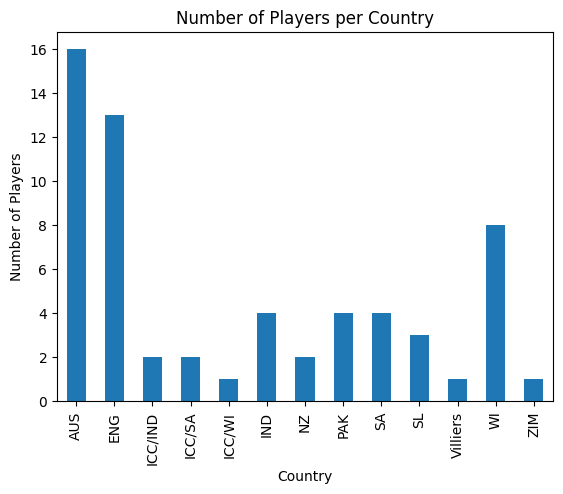

In [57]:
# Create a bar chart of the number of players per country
df.groupby('Country')['Player'].count().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.title('Number of Players per Country')
plt.show()

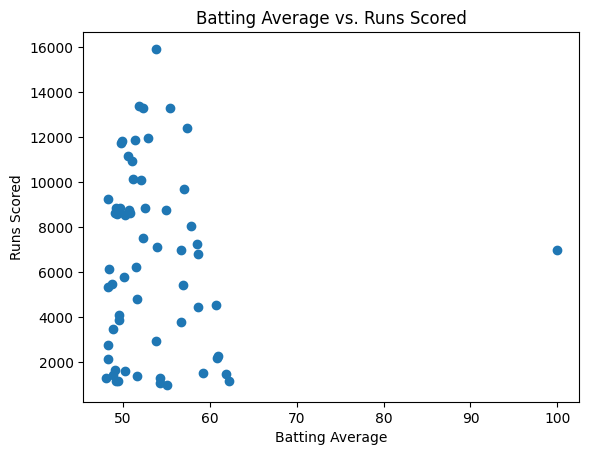

In [58]:
# Create a scatter plot of batting average vs. runs scored
plt.scatter(df['Ave'], df['Runs'])
plt.xlabel('Batting Average')
plt.ylabel('Runs Scored')
plt.title('Batting Average vs. Runs Scored')
plt.show()

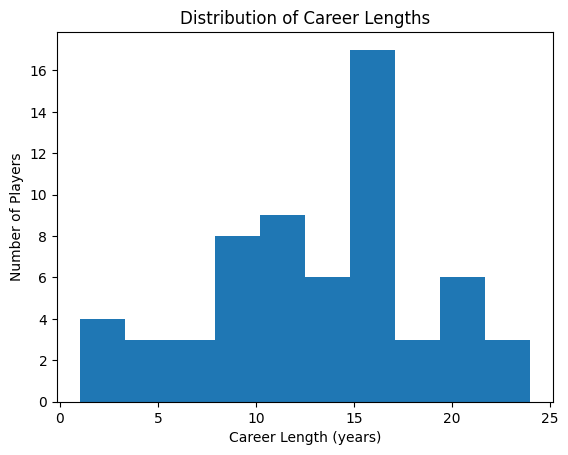

In [59]:
# Create a histogram of career lengths
plt.hist(df['Career_Length'])
plt.xlabel('Career Length (years)')
plt.ylabel('Number of Players')
plt.title('Distribution of Career Lengths')
plt.show()

## Summary

The dataset offers a comprehensive insight into cricket players' batting prowess, covering a spectrum of key attributes including:

- **Matches Played**
- **Innings Batted**
- **Runs Scored**
- **Highest Innings Score**
- **Batting Average**
- **Batting Strike Rate**
- **Centuries Scored**
- **Fifties Scored**
- **Ducks Scored**
- **Boundary Fours**
- **Boundary Sixes**

This extensive dataset allows for in-depth analysis of player performance, playing style, and overall contribution to their respective teams. With this wealth of information, cricket enthusiasts, analysts, and teams alike can uncover valuable insights to inform strategic decisions and enrich their understanding of the game.
